In [61]:
### Importing all important liabrary
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras import layers, models
import pickle


In [62]:
### Reading the CSV file 
df=pd.read_csv(r'seattle-weather.csv')

In [63]:
### Here we can see the top 5 Rows
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [64]:
### Here we can see the Bottom 5 Rows
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [65]:
### Here we can see the shape of the data in the form of rows, columns
df.shape

(1461, 6)

In [66]:
### Checking the null values in each columns
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [67]:
### Checking the null values in overall data
df.isnull().sum().sum()

0

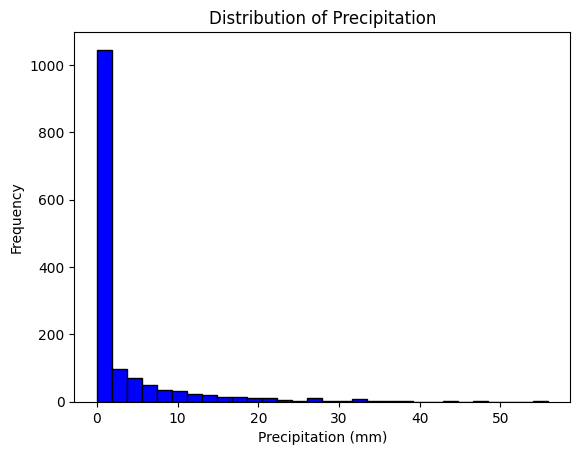

In [68]:
# Plot 1: Distribution of precipitation
plt.hist(df['precipitation'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

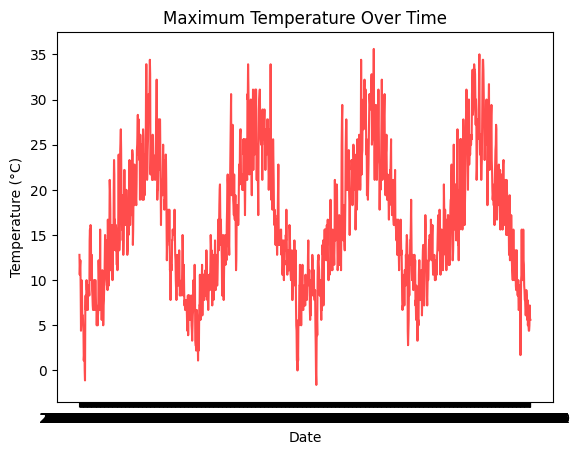

In [69]:
# Plot 2: Maximum temperature over time
plt.plot(df['date'], df['temp_max'], label='Max Temp', color='red', alpha=0.7)
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

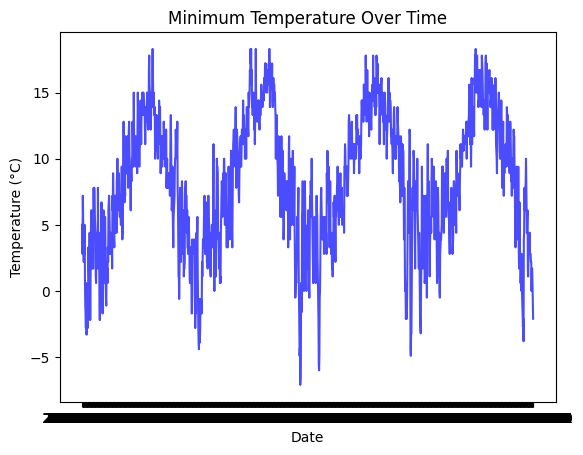

In [70]:
# Plot 3: Minimum temperature over time
plt.plot(df['date'], df['temp_min'], label='Min Temp', color='blue', alpha=0.7)
plt.title('Minimum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

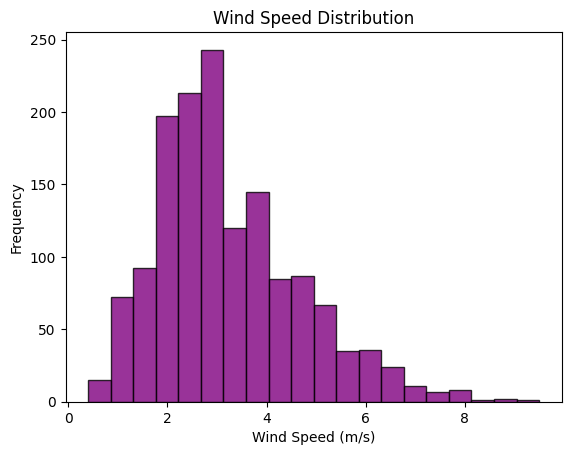

In [71]:
# Plot 4: Wind speed distribution
plt.hist(df['wind'], bins=20, color='purple', edgecolor='black', alpha=0.8)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

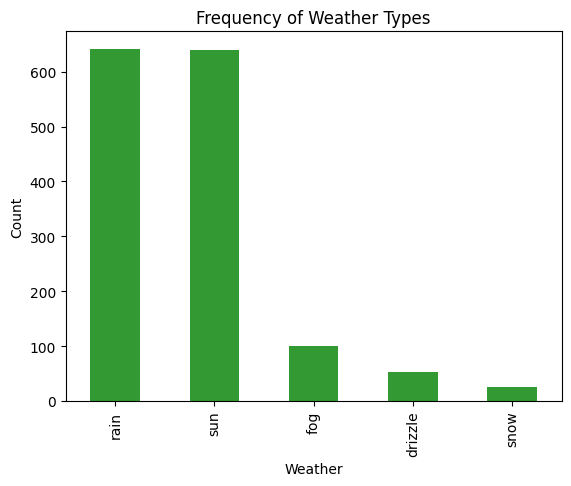

In [72]:
# Plot 5: Weather type frequency
df['weather'].value_counts().plot(kind='bar', color='green', alpha=0.8)
plt.title('Frequency of Weather Types')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

C:\Users\0819\AppData\Local\Temp\ipykernel_5580\484294247.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['temp_max'], df['temp_min']], labels=['Max Temp', 'Min Temp'], patch_artist=True)


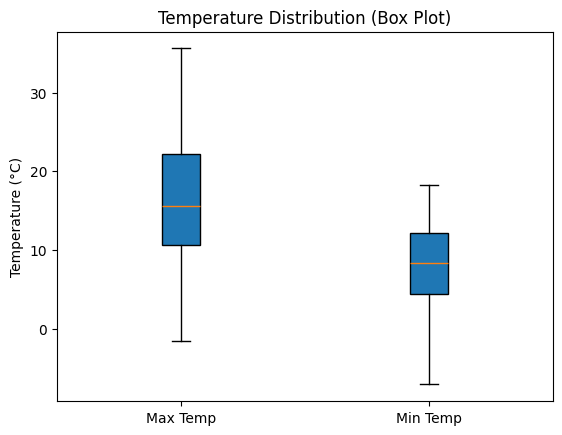

In [73]:
# Plot 6: Box plot of temperatures
plt.boxplot([df['temp_max'], df['temp_min']], labels=['Max Temp', 'Min Temp'], patch_artist=True)
plt.title('Temperature Distribution (Box Plot)')
plt.ylabel('Temperature (°C)')
plt.show()

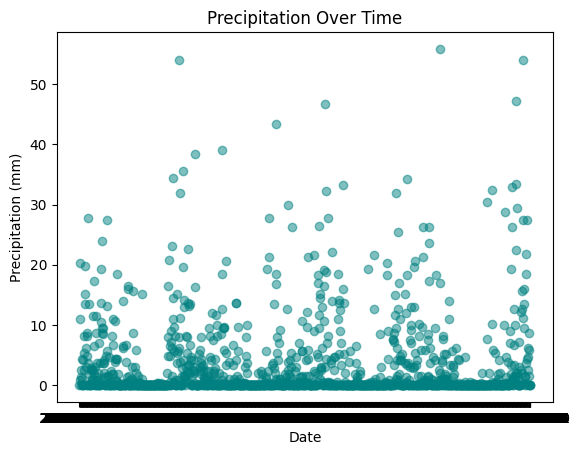

In [74]:
# Plot 7: Precipitation over time
plt.scatter(df['date'], df['precipitation'], alpha=0.5, color='teal')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

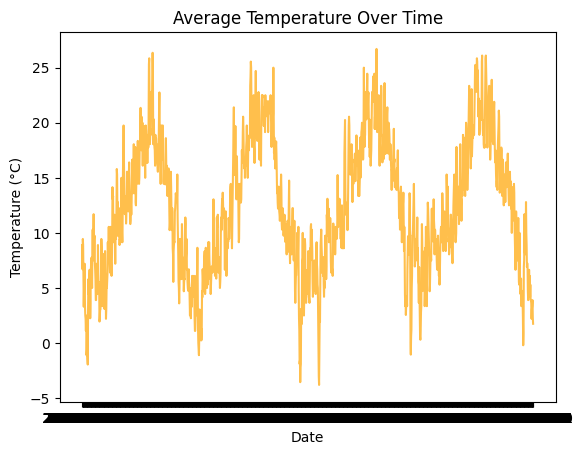

In [75]:
# Plot 8: Average temperature (Max + Min) over time
df['temp_avg'] = (df['temp_max'] + df['temp_min']) / 2
plt.plot(df['date'], df['temp_avg'], label='Avg Temp', color='orange', alpha=0.7)
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

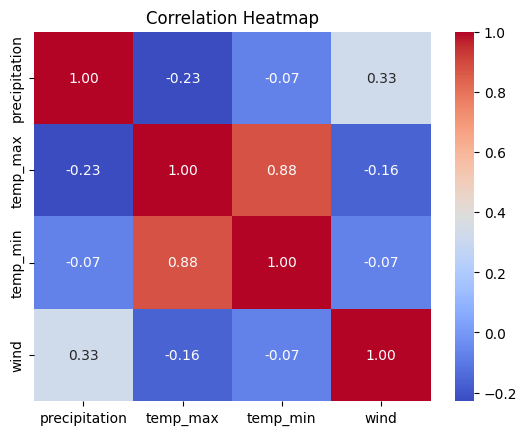

In [76]:
# Plot 9: Correlation heatmap
import seaborn as sns

correlation_matrix = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

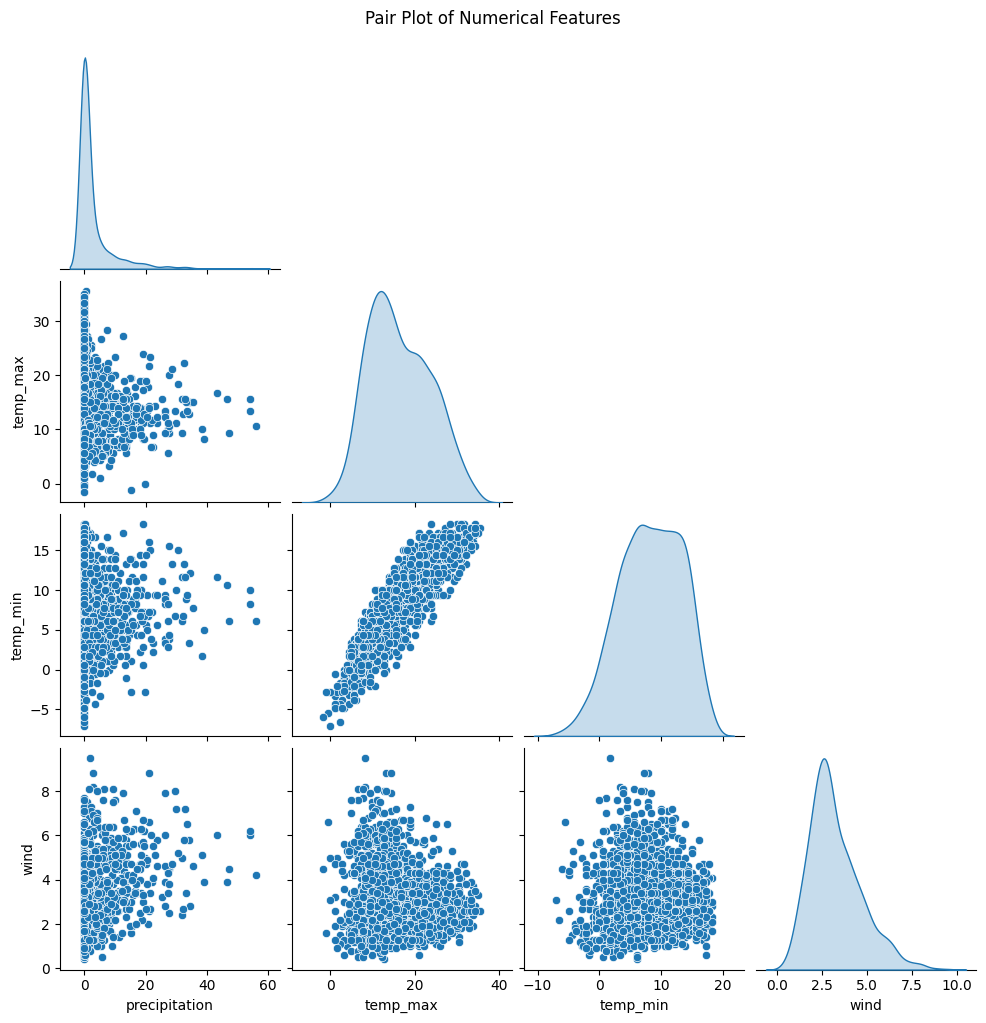

In [77]:
# Plot 10: Pair plot of key numerical features
sns.pairplot(df[['precipitation', 'temp_max', 'temp_min', 'wind']], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [78]:
df=pd.read_csv(r'seattle-weather.csv')

In [79]:
### Drop the Date Column
df.drop('date',axis=1,inplace=True)

**After Dropping the clumn we can again see the Data Frame**

In [80]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [81]:
df.tail()

,precipitation,temp_max,temp_min,wind,weather
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun
1460,0.0,5.6,-2.1,3.5,sun


In [82]:
### Here we are checking the unique values present in the specific column and their values count.
df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

**Above Wheather column having the Categorical Data so we have to convert into numerical data**

In [83]:
## Here we are using label encoder to convert categorical data into numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

In [84]:
df.weather.value_counts()

weather
2    641
4    640
1    101
0     53
3     26
Name: count, dtype: int64

### **Splitting the Data into X and Y**

In [85]:
from imblearn.over_sampling import SMOTE

#Preprocess Data for Machine Learning Development
X = df.drop(['weather'], axis = 1)
y = df['weather']

oversample = SMOTE(random_state=1)
X_final, Y_final = oversample.fit_resample(X, y)

x_train, x_test, y_train, y_test = train_test_split(X_final, Y_final, test_size = 0.2, random_state = 10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2564, 4), (641, 4), (2564,), (641,))

In [86]:
x_test.head()

,precipitation,temp_max,temp_min,wind
980,0.000000,28.300000,13.300000,2.100000
882,0.000000,22.200000,10.600000,2.300000
176,0.500000,19.400000,11.100000,3.100000
2852,14.370568,2.949578,-1.970568,1.941531
2985,8.168007,3.420320,0.031388,5.584306


In [87]:
y_test.head()

980     4
882     4
176     2
2852    3
2985    3
Name: weather, dtype: int32

### **Model Training**

**GaussianNB**

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [89]:
gnb = GaussianNB()
# np.random.seed(10)
gnb.fit(x_train,y_train)

GaussianNB()

In [90]:
y_pred = gnb.predict(x_train)
acc_gnb = accuracy_score(y_train,y_pred)
ps_gnb = precision_score(y_train,y_pred,average = "micro")
rs_gnb = recall_score(y_train,y_pred, average = "micro")
f1_gnb = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_gnb}")
print(f"Precision Score = {acc_gnb}")
print(f"Recall Score = {acc_gnb}")
print(f"F1 Score = {acc_gnb}")

Accuracy Score = 0.640405616224649
Precision Score = 0.640405616224649
Recall Score = 0.640405616224649
F1 Score = 0.640405616224649


In [91]:
y_pred = gnb.predict(x_test)
acc_gnb = accuracy_score(y_test,y_pred)
ps_gnb = precision_score(y_test,y_pred,average = "micro")
rs_gnb = recall_score(y_test,y_pred, average = "micro")
f1_gnb = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_gnb}")
print(f"Precision Score = {acc_gnb}")
print(f"Recall Score = {acc_gnb}")
print(f"F1 Score = {acc_gnb}")

Accuracy Score = 0.6209048361934477
Precision Score = 0.6209048361934477
Recall Score = 0.6209048361934477
F1 Score = 0.6209048361934477


Here is the confusion matrix of the model 
 
 [[ 31  42   0   0  49]
 [ 35  53   0   0  36]
 [  2   3 107  13   4]
 [  0   0   5 120   0]
 [ 24  30   0   0  87]]


<Axes: >

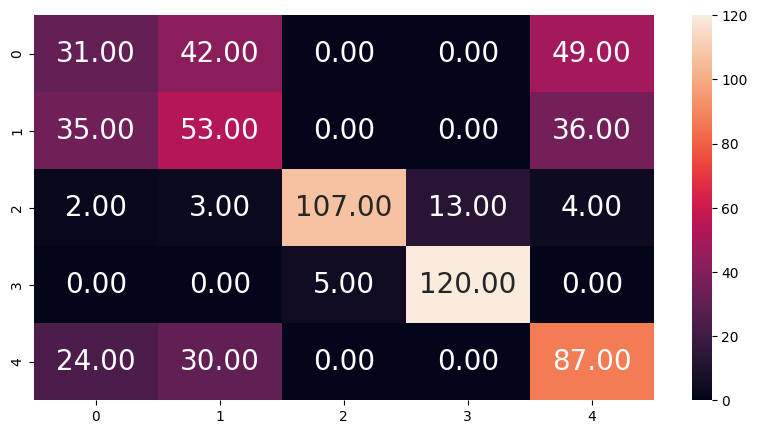

In [92]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

**LogisticRegression**

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [94]:
y_pred = lr.predict(x_train)
acc_lr = accuracy_score(y_train,y_pred)
ps_lr = precision_score(y_train,y_pred,average = "micro")
rs_lr = recall_score(y_train,y_pred, average = "micro")
f1_lr = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_lr}")
print(f"Precision Score = {acc_lr}")
print(f"Recall Score = {acc_lr}")
print(f"F1 Score = {acc_lr}")

Accuracy Score = 0.6158346333853354
Precision Score = 0.6158346333853354
Recall Score = 0.6158346333853354
F1 Score = 0.6158346333853354


In [95]:
y_pred = lr.predict(x_test)
acc_lr = accuracy_score(y_test,y_pred)
ps_lr = precision_score(y_test,y_pred,average = "micro")
rs_lr = recall_score(y_test,y_pred, average = "micro")
f1_lr = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_lr}")
print(f"Precision Score = {acc_lr}")
print(f"Recall Score = {acc_lr}")
print(f"F1 Score = {acc_lr}")

Accuracy Score = 0.5959438377535101
Precision Score = 0.5959438377535101
Recall Score = 0.5959438377535101
F1 Score = 0.5959438377535101


Here is the confusion matrix of the model 
 
 [[ 42  31   0   0  49]
 [ 54  35   0   1  34]
 [  4   3 111   6   5]
 [  0   0   8 117   0]
 [ 31  28   1   4  77]]


<Axes: >

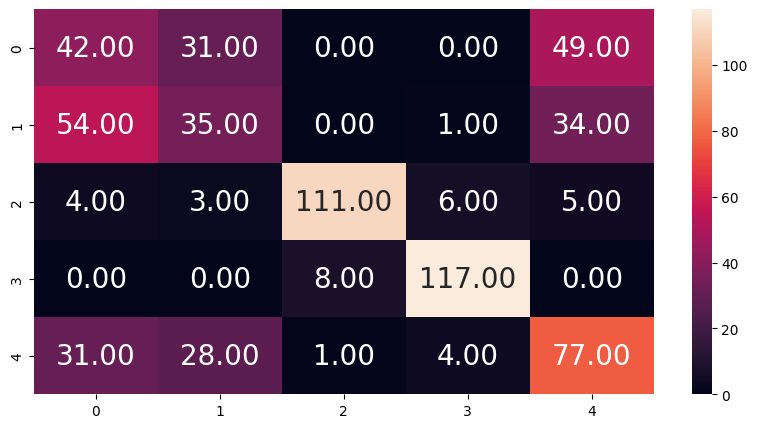

In [96]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

### CNN

In [97]:

# Check the shape of the input data
print(x_train.shape)  # Check the shape of X_train to ensure it matches your expectations

# Define the CNN architecture
model_cnn = models.Sequential()
# model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
# model_cnn.add(layers.MaxPooling2D((2, 2)))
# model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_cnn.add(layers.MaxPooling2D((2, 2)))
# model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add fully connected layers for classification
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dense(5, activation='softmax'))  # 5 classes for classification

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
model_cnn.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

# Evaluating the model accuracy
y_pred = model_cnn.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Get the index of the highest probability
acc_cnn1 = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {acc_cnn1}")


(2564, 4)
Epoch 1/100
81/81 [==============================] - 1s 5ms/step - loss: 1.4353 - accuracy: 0.4446 - val_loss: 1.0216 - val_accuracy: 0.5117
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 0.9762 - accuracy: 0.5281 - val_loss: 0.9444 - val_accuracy: 0.5507
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 0.9234 - accuracy: 0.5608 - val_loss: 0.8994 - val_accuracy: 0.5819
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.8894 - accuracy: 0.5850 - val_loss: 0.8693 - val_accuracy: 0.5944
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 0.8716 - accuracy: 0.5905 - val_loss: 0.8535 - val_accuracy: 0.6100
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.8447 - accuracy: 0.6057 - val_loss: 0.8556 - val_accuracy: 0.5554
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.8510 - accuracy: 0.6002 - val_loss: 0.8157 - val_accuracy: 0.6334
Epo

In [98]:
with open('CNN_model.pkl','wb') as fp:
    pickle.dump(model_cnn,fp)

In [99]:
with open('CNN_model.pkl','rb') as fp:
    mod=pickle.load(fp)

In [100]:
y_pred = mod.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Get the index of the highest probability
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}")

21/21 [==============================] - 0s 1ms/step
Accuracy: 0.6817472698907956


**MLP**

In [101]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=2000)
mlp.fit(x_train,y_train)

MLPClassifier(max_iter=2000)

In [102]:
y_pred = mlp.predict(x_train)
acc_mlp = accuracy_score(y_train,y_pred)
ps_mlp = precision_score(y_train,y_pred,average = "micro")
rs_mlp = recall_score(y_train,y_pred, average = "micro")
f1_mlp = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_mlp}")
print(f"Precision Score = {acc_mlp}")
print(f"Recall Score = {acc_mlp}")
print(f"F1 Score = {acc_mlp}")

Accuracy Score = 0.7008580343213728
Precision Score = 0.7008580343213728
Recall Score = 0.7008580343213728
F1 Score = 0.7008580343213728


In [103]:
y_pred = mlp.predict(x_test)
acc_mlp = accuracy_score(y_test,y_pred)
ps_mlp = precision_score(y_test,y_pred,average = "micro")
rs_mlp = recall_score(y_test,y_pred, average = "micro")
f1_mlp = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_mlp}")
print(f"Precision Score = {acc_mlp}")
print(f"Recall Score = {acc_mlp}")
print(f"F1 Score = {acc_mlp}")

Accuracy Score = 0.6801872074882995
Precision Score = 0.6801872074882995
Recall Score = 0.6801872074882995
F1 Score = 0.6801872074882995


Here is the confusion matrix of the model 
 
 [[ 71  38   0   0  13]
 [ 35  68   0   0  21]
 [  3   4 114   4   4]
 [  0   0   4 121   0]
 [ 42  37   0   0  62]]


<Axes: >

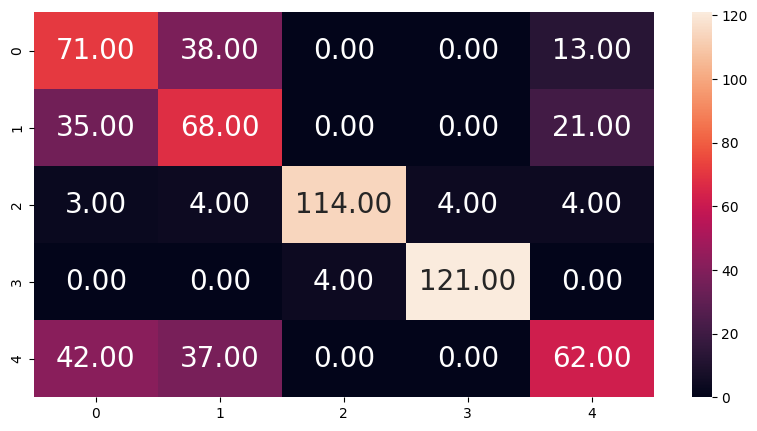

In [104]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

**AdaBoost**

In [105]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [106]:
y_pred = adb.predict(x_train)
acc_adb = accuracy_score(y_train,y_pred)
ps_adb = precision_score(y_train,y_pred,average = "micro")
rs_adb = recall_score(y_train,y_pred, average = "micro")
f1_adb = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_adb}")
print(f"Precision Score = {acc_adb}")
print(f"Recall Score = {acc_adb}")
print(f"F1 Score = {acc_adb}")

Accuracy Score = 0.4247269890795632
Precision Score = 0.4247269890795632
Recall Score = 0.4247269890795632
F1 Score = 0.4247269890795632


In [107]:
y_pred = adb.predict(x_test)
acc_adb = accuracy_score(y_test,y_pred)
ps_adb = precision_score(y_test,y_pred,average = "micro")
rs_adb = recall_score(y_test,y_pred, average = "micro")
f1_adb = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_adb}")
print(f"Precision Score = {acc_adb}")
print(f"Recall Score = {acc_adb}")
print(f"F1 Score = {acc_adb}")

Accuracy Score = 0.45553822152886114
Precision Score = 0.45553822152886114
Recall Score = 0.45553822152886114
F1 Score = 0.45553822152886114


Here is the confusion matrix of the model 
 
 [[  8   8  77   0  29]
 [  6  24  65   0  29]
 [  0   1 122   0   6]
 [  0   0  41  84   0]
 [  3  10  74   0  54]]


<Axes: >

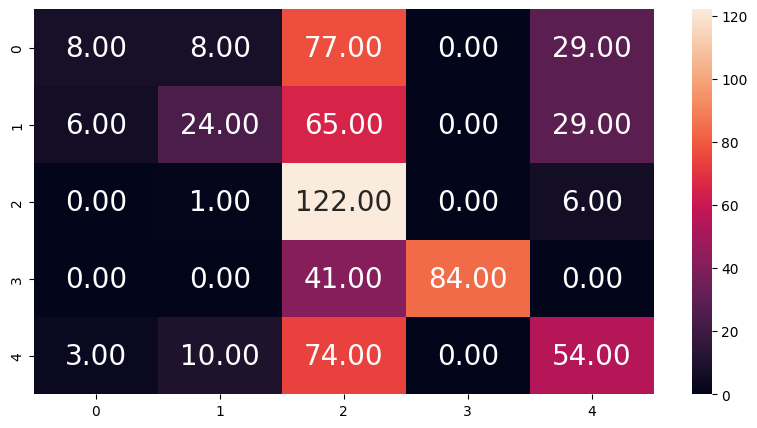

In [108]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

**Random Forest**

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [110]:
y_pred = rf.predict(x_train)
acc_rf = accuracy_score(y_train,y_pred)
ps_rf = precision_score(y_train,y_pred,average = "micro")
rs_rf = recall_score(y_train,y_pred, average = "micro")
f1_rf = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_rf}")
print(f"Precision Score = {acc_rf}")
print(f"Recall Score = {acc_rf}")
print(f"F1 Score = {acc_rf}")

Accuracy Score = 0.999219968798752
Precision Score = 0.999219968798752
Recall Score = 0.999219968798752
F1 Score = 0.999219968798752


In [111]:
y_pred = rf.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred)
ps_rf = precision_score(y_test,y_pred,average = "micro")
rs_rf = recall_score(y_test,y_pred, average = "micro")
f1_rf = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_rf}")
print(f"Precision Score = {acc_rf}")
print(f"Recall Score = {acc_rf}")
print(f"F1 Score = {acc_rf}")

Accuracy Score = 0.8346333853354134
Precision Score = 0.8346333853354134
Recall Score = 0.8346333853354134
F1 Score = 0.8346333853354134


Here is the confusion matrix of the model 
 
 [[ 98   9   2   0  13]
 [ 13 101   0   0  10]
 [  2   0 118   2   7]
 [  0   0   3 122   0]
 [ 18  26   1   0  96]]


<Axes: >

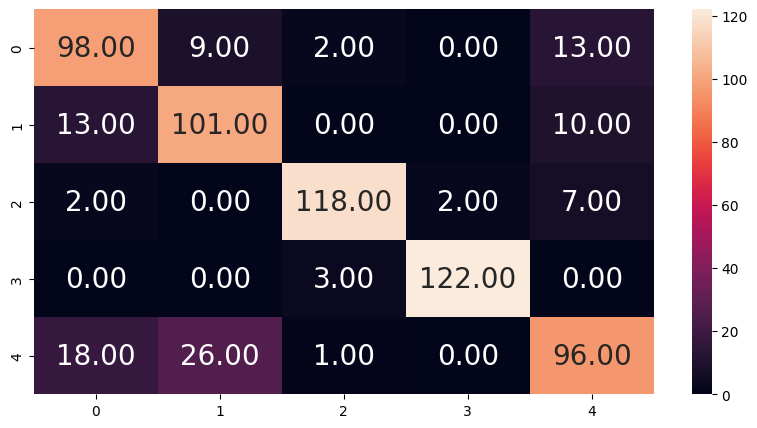

In [112]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

**Decision Tree**

In [113]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [114]:
y_pred = dt.predict(x_train)
acc_dt = accuracy_score(y_train,y_pred)
ps_dt = precision_score(y_train,y_pred,average = "micro")
rs_dt = recall_score(y_train,y_pred, average = "micro")
f1_dt = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_dt}")
print(f"Precision Score = {acc_dt}")
print(f"Recall Score = {acc_dt}")
print(f"F1 Score = {acc_dt}")

Accuracy Score = 0.999219968798752
Precision Score = 0.999219968798752
Recall Score = 0.999219968798752
F1 Score = 0.999219968798752


In [115]:
y_pred = dt.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred)
ps_dt = precision_score(y_test,y_pred,average = "micro")
rs_dt = recall_score(y_test,y_pred, average = "micro")
f1_dt = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_dt}")
print(f"Precision Score = {acc_dt}")
print(f"Recall Score = {acc_dt}")
print(f"F1 Score = {acc_dt}")

Accuracy Score = 0.781591263650546
Precision Score = 0.781591263650546
Recall Score = 0.781591263650546
F1 Score = 0.781591263650546


Here is the confusion matrix of the model 
 
 [[ 95   5   2   0  20]
 [ 17  84   5   0  18]
 [  0   0 120   1   8]
 [  0   0   8 117   0]
 [ 29  20   7   0  85]]


<Axes: >

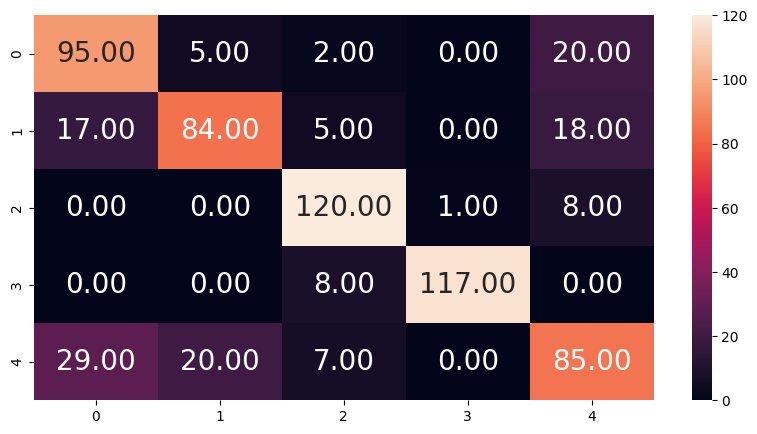

In [116]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

**Hyper Parameter Tunning For Random Forest**

In [118]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Define the corrected hyperparameter grid
param_grid = { 'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', None] } # Removed 'auto'


# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [119]:
rf_hyp = RandomForestClassifier(max_depth = 30, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
rf_hyp.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=200)

In [120]:
y_pred = rf_hyp.predict(x_train)
acc_rf_hyp = accuracy_score(y_train,y_pred)
ps_rf_hyp = precision_score(y_train,y_pred,average = "micro")
rs_rf_hyp = recall_score(y_train,y_pred, average = "micro")
f1_rf_hyp = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_rf_hyp}")
print(f"Precision Score = {acc_rf_hyp}")
print(f"Recall Score = {acc_rf_hyp}")
print(f"F1 Score = {acc_rf_hyp}")

Accuracy Score = 0.999219968798752
Precision Score = 0.999219968798752
Recall Score = 0.999219968798752
F1 Score = 0.999219968798752


In [121]:
y_pred = rf_hyp.predict(x_test)
acc_rf_hyp = accuracy_score(y_test,y_pred)
ps_rf_hyp = precision_score(y_test,y_pred,average = "micro")
rs_rf_hyp = recall_score(y_test,y_pred, average = "micro")
f1_rf_hyp = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_rf_hyp}")
print(f"Precision Score = {acc_rf_hyp}")
print(f"Recall Score = {acc_rf_hyp}")
print(f"F1 Score = {acc_rf_hyp}")

Accuracy Score = 0.8424336973478939
Precision Score = 0.8424336973478939
Recall Score = 0.8424336973478939
F1 Score = 0.8424336973478939


Here is the confusion matrix of the model 
 
 [[100   8   2   0  12]
 [ 13 102   0   0   9]
 [  2   0 118   2   7]
 [  0   0   3 122   0]
 [ 17  24   2   0  98]]


<Axes: >

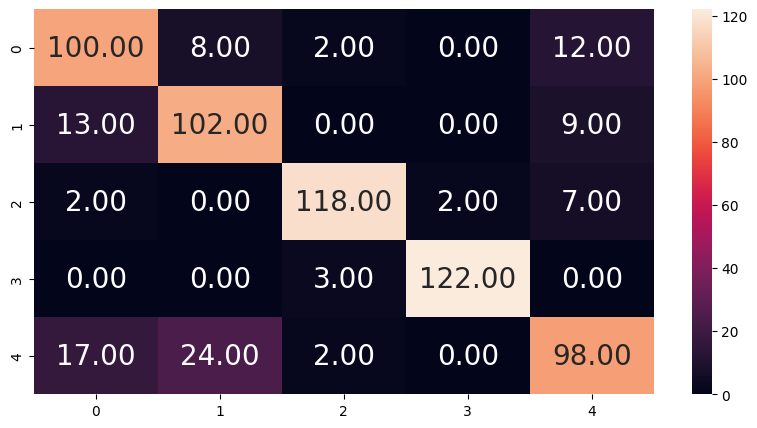

In [122]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

### **GRAPH**

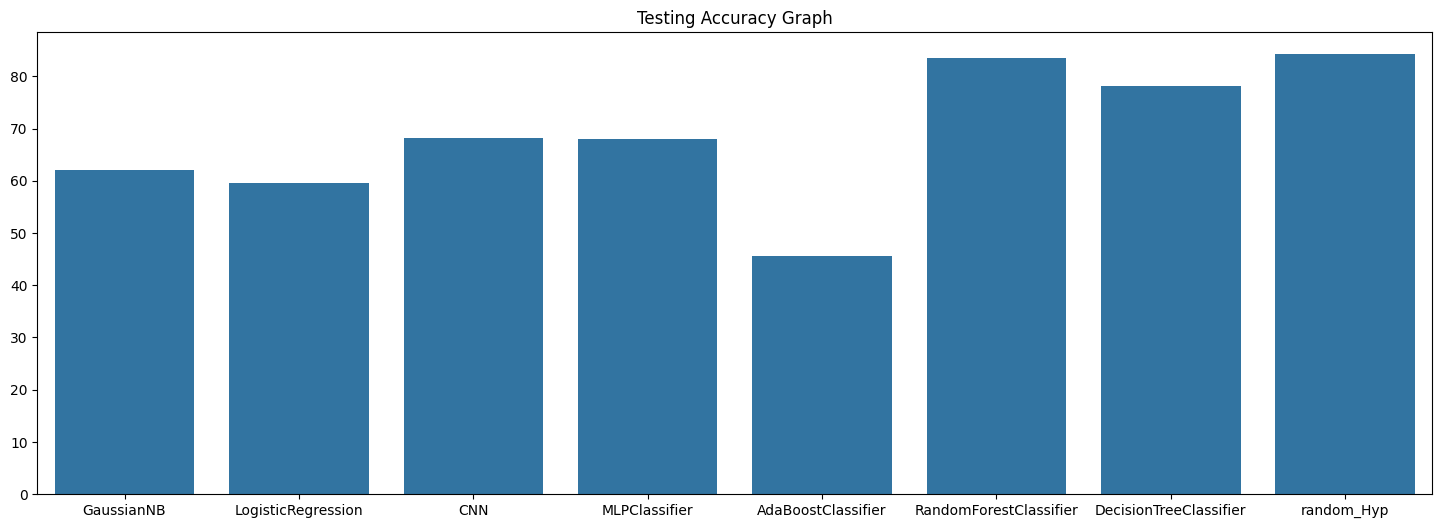

In [123]:
import seaborn as sns
Algorithum = ["GaussianNB", "LogisticRegression", "CNN", "MLPClassifier","AdaBoostClassifier", "RandomForestClassifier", "DecisionTreeClassifier", "random_Hyp"]
Accuracy = [acc_gnb*100, acc_lr*100, acc_cnn1*100, acc_mlp*100,acc_adb*100, acc_rf*100, acc_dt*100, acc_rf_hyp*100]

plt.figure(figsize=(18,6))
sns.barplot(x = Algorithum, y = Accuracy)
plt.title("Testing Accuracy Graph")
plt.show()

**Prediction**

In [124]:
x_test.head()

,precipitation,temp_max,temp_min,wind
980,0.000000,28.300000,13.300000,2.100000
882,0.000000,22.200000,10.600000,2.300000
176,0.500000,19.400000,11.100000,3.100000
2852,14.370568,2.949578,-1.970568,1.941531
2985,8.168007,3.420320,0.031388,5.584306


In [125]:
y_test.head()

980     4
882     4
176     2
2852    3
2985    3
Name: weather, dtype: int32

In [126]:
abc=[14.370568, 2.949578, -1.970568, 1.941531]
result=rf.predict([abc])
result=result[0]
if result==0:
    print("Drizzle")
elif result==1:
    print("Fog")
elif result==2:
    print("Rain")
elif result==3:
    print("Snow")
else:
    print("Sun")

Snow


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [127]:
abc=[0.500000, 19.400000, 11.100000, 3.100000]
result=rf.predict([abc])
result=result[0]
if result==0:
    print("Drizzle")
elif result==1:
    print("Fog")
elif result==2:
    print("Rain")
elif result==3:
    print("Snow")
else:
    print("Sun")

Rain


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [128]:
abc=[0.000000, 28.300000, 13.300000, 2.100000]
result=rf.predict([abc])
result=result[0]
if result==0:
    print("Drizzle")
elif result==1:
    print("Fog")
elif result==2:
    print("Rain")
elif result==3:
    print("Snow")
else:
    print("Sun")

Sun


C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
